In [1]:
# Save this file in the name of the ML model you are using
import pandas as pd
import numpy as np
import os

In [2]:
# Website for the dataset:
# https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data?select=icml_face_data.csv
CLASS_NAMES = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
FILE_NAME = "train.csv" # Insert file name
WHITE_IMAGES = [6458,  7629, 10423, 11286, 13148, 13402, 13988, 15894, 22198, 22927, 28601, 59]

In [3]:
data_path = ["C:/Users/deepai-admin/Desktop/Minor-AI-main/data"] # Insert data file path
file_path = os.sep.join(data_path + [FILE_NAME])
data = pd.read_csv(file_path)
data = data.drop(index=WHITE_IMAGES, axis=0)

# If icml_face_data.csv is used
# data.drop(' Usage', axis=1, inplace=True)

data.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
data.shape

(28697, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28697 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28697 non-null  int64 
 1   pixels   28697 non-null  object
dtypes: int64(1), object(1)
memory usage: 672.6+ KB


In [6]:
data.describe()

,emotion
count,28697.000000
mean,3.318117
std,1.876194
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [7]:
from collections import Counter

print('number of samples: ', len(data))
print('number of unique samples: ', len(data[data.columns[1]].unique()))
print('keys: ', list(data.keys()))
print('\n')

for i in range(len(CLASS_NAMES)):
    print(CLASS_NAMES[i] + ' ', ((data['emotion'].value_counts())[i]))


number of samples:  28697
number of unique samples:  27471
keys:  ['emotion', 'pixels']


Angry  3988
Disgust  436
Fear  4096
Happy  7214
Sad  4829
Surprise  3170
Neutral  4964


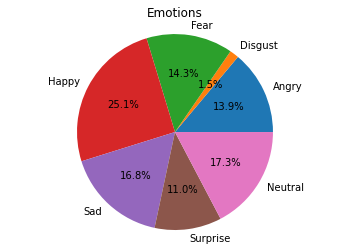

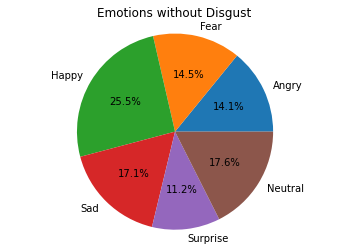

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
data_Angry = data[data['emotion'] == 0]
data_Disgust = data[data['emotion'] == 1]
data_Fear = data[data['emotion'] == 2]
data_Happy = data[data['emotion'] == 3]
data_Sad = data[data['emotion'] == 4]
data_Surprise = data[data['emotion'] == 5]
data_Neutral = data[data['emotion'] == 6]

sizes = [data_Angry.shape[0], data_Disgust.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=CLASS_NAMES, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions')


plt.show()

sizes = [data_Angry.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]
labels = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral' ]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions without Disgust')

plt.show()

In [9]:
data_exclude_disgust = data[data['emotion'] != 1] # Drops the emotion Disgust
data_exclude_disgust = data_exclude_disgust.replace({
    2 : 1,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 5
})
data_exclude_disgust.shape, data_exclude_disgust.emotion.unique()

((28261, 2), array([0, 1, 3, 5, 2, 4], dtype=int64))

In [10]:
def data_X_y(data):
    # Split data into X & y
    X = data.drop('emotion', axis='columns')
    y = data['emotion']

    # Reshapes X into 3D array
    X = [pixels.split(" ") for pixels in data["pixels"]]
    X = np.array(X)
    X = X.astype("int32")
    X = np.array([image.reshape(48, 48) for image in X])
    X = X/255.0
    X = X.reshape(len(X), 48, 48, 1)
    
    return X,y

In [11]:
%time X,y = data_X_y(data_exclude_disgust)

Wall time: 41.3 s


In [12]:
print(X.max())
print(X.shape)
print(X.min(), X.max())
print(y.shape)

1.0
(28261, 48, 48, 1)
0.0 1.0
(28261,)


In [13]:
y.value_counts()

2    7214
5    4964
3    4829
1    4096
0    3988
4    3170
Name: emotion, dtype: int64

In [14]:
from skimage.io import imread
from skimage.transform import resize

def show_samples(X, data):
    # Array with all the unique emotions
    labels = np.unique(data_exclude_disgust['emotion'])
    print(labels)

    fig, axes = plt.subplots(6, len(labels))
    fig.set_size_inches(15,10)
    fig.tight_layout()

    for ax, label in zip(axes, labels):
        i = 0 # starting point
        for a in ax:
            # A list with a the index for the corresponding emotion
            data_label_index_list = data.index[data['emotion'] == label].tolist()

            a.imshow(X[data_label_index_list[i]])
            a.axis('off')
            a.set_title(CLASS_NAMES_WITHOUT_DISGUST[label])
            i=i+1


[0 1 2 3 4 5]


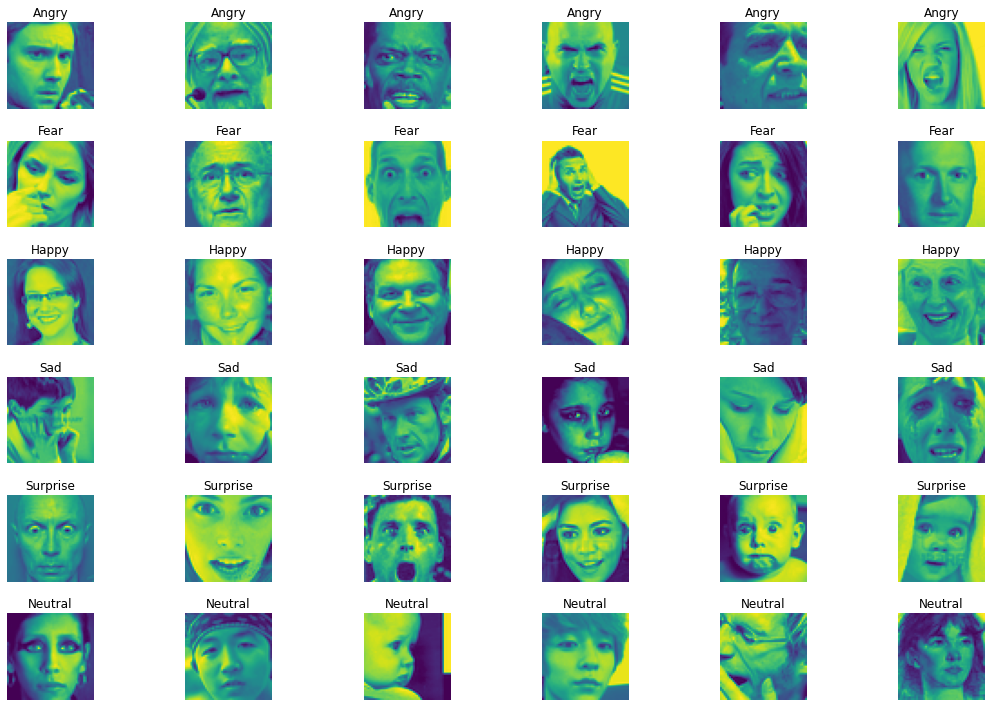

In [15]:
show_samples(X, data_exclude_disgust)

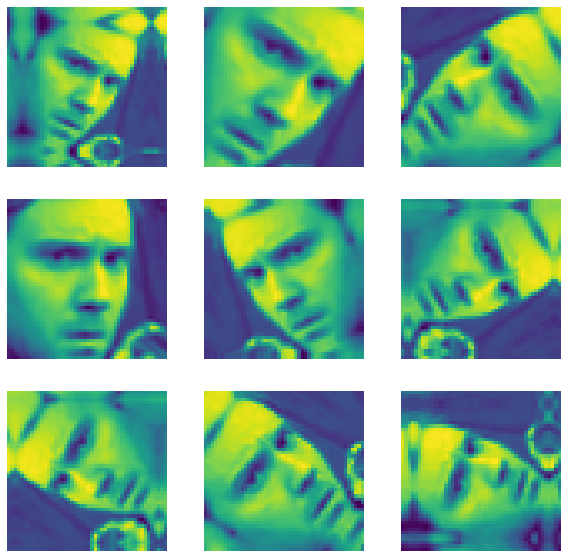

In [16]:
import tensorflow as tf
from tensorflow.keras import layers

# For more you can visit:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.25),
    layers.experimental.preprocessing.RandomZoom(0.25),
])

image = tf.expand_dims(X[0], 0) # X[0] can be changed to view different images

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [17]:
def join_list(list_pixels):
    # Creates a string from the list of pixels
    final_str = ' '.join(str(int(v)) for v in list_pixels)
    return final_str

def create_csv_data_augmentation(X, y, copies):
    # Creates new dataframe
    column_names = ["emotion", "pixels", "Original"]
    data_augmentated = pd.DataFrame(columns = column_names)
    
    for image,emotion in zip(X,y):
        # Adds the original image to the dataframe converted to a string
        image_array = list((np.array(image)).flat)
        image_string = join_list(image_array)
        new_row = {'emotion':emotion, 'pixels':image_string, 'Original':True}
        data_augmentated = data_augmentated.append(new_row,ignore_index=True)
        image_expand = tf.expand_dims(image, 0)

        for i in range(copies):
            # Adds the augmented image to the dataframe converted to a string
            augmented_image = data_augmentation(image_expand)
            augmented_image = list((np.array(augmented_image[0])).flat)
            augmented_image_string = join_list(augmented_image)
            new_row = {'emotion':emotion, 'pixels':augmented_image_string, 'Original':False}
            data_augmentated = data_augmentated.append(new_row, ignore_index=True)
    
    # Saves the dataframe to a csv file and in the title the amount of corresponding data augmentations
    save_data_augmentated_filepath = ('data/face_augmentated_{}'.format(copies))
    data_augmentated.to_csv(save_data_augmentated_filepath + '.csv', index = False)
    
    return data_augmentated

In [18]:
# # You can adjust the last value to choose how many unique copies you want to make
# # The higher the copies the longer the run time
# data_aug = create_csv_data_augmentation((X*255.0), y, 1) 

In [19]:
# # For when the file is created
FILE_NAME_AUG = "face_augmentated_1.csv" # Update name
file_path_aug = os.sep.join(data_path + [FILE_NAME_AUG])
data_aug = pd.read_csv(file_path_aug)

In [20]:
data_aug.shape

(56522, 3)

In [21]:
data_aug.head()

,emotion,pixels,Original
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,True
1,0,174 172 175 177 178 182 185 184 186 186 186 18...,False
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,True
3,0,153 146 145 153 151 145 144 155 171 175 174 16...,False
4,1,231 212 156 164 174 138 161 173 182 200 106 38...,True


In [22]:
data_aug.drop('Original', axis=1, inplace=True)
X_aug, y_aug = data_X_y(data_aug)
y_aug = y_aug.astype('int32')

print(X_aug.shape)
print(y_aug.shape)

(56522, 48, 48, 1)
(56522,)


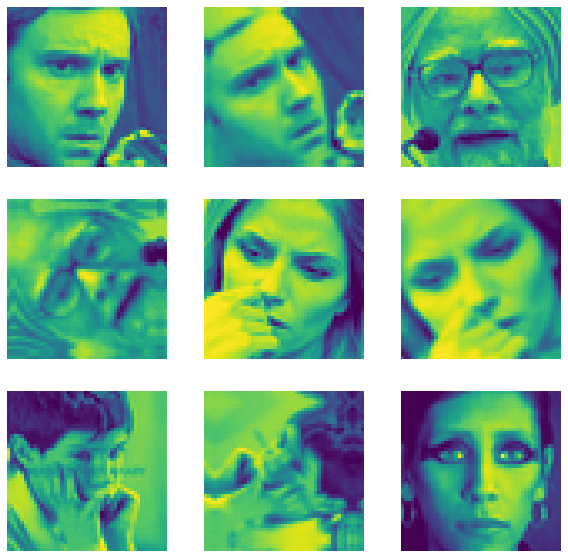

In [23]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_aug[i])
    plt.axis("off")

In [24]:
from builtins import range
from builtins import object

def reshape_X(X):
    num_training = X.shape[0]
    mask = list(range(num_training))
    X_reshape = X[mask]

    # Reshape the image data into rows
    X_reshape = np.reshape(X, (X.shape[0], -1))
    
    return X_reshape

In [25]:
print(X.shape)
X = reshape_X(X)
print(X.shape)

(28261, 48, 48, 1)
(28261, 2304)


In [26]:
print(X_aug.shape)
X_aug = reshape_X(X_aug)
print(X_aug.shape)

(56522, 48, 48, 1)
(56522, 2304)


In [27]:
# pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE()

In [28]:
X_rus, y_rus = rus.fit_resample(X,y) # This data is undersampled
X_ros, y_ros = ros.fit_resample(X,y) # This data is oversampled
X_smote, y_smote = smote.fit_resample(X,y) # This data is oversampled with smote

print(y_rus.value_counts())
print(y_ros.value_counts())
print(y_smote.value_counts())

0    3170
1    3170
2    3170
3    3170
4    3170
5    3170
Name: emotion, dtype: int64
0    7214
1    7214
2    7214
3    7214
4    7214
5    7214
Name: emotion, dtype: int64
0    7214
1    7214
2    7214
3    7214
4    7214
5    7214
Name: emotion, dtype: int64


In [29]:
print("SMOTE has of the {}, {} unique samples".format(len(X_smote),len(np.unique(X_smote, axis=0))))
print("ROS has of the {}, {} unique samples".format(len(X_ros),len(np.unique(X_ros, axis=0))))
print("RUS has of the {}, {} unique samples".format(len(X_rus),len(np.unique(X_rus, axis=0))))

SMOTE has of the 43284, 41601 unique samples
ROS has of the 43284, 27092 unique samples
RUS has of the 19020, 18187 unique samples


In [30]:
X_aug_smote, y_aug_smote = smote.fit_resample(X_aug,y_aug) # This data is oversampled with smote
X_aug_ros, y_aug_ros = ros.fit_resample(X_aug,y_aug) # This data is oversampled
X_aug_rus, y_aug_rus = rus.fit_resample(X_aug,y_aug) # This data is undersampled

print(y_aug_rus.value_counts())
print(y_aug_ros.value_counts())
print(y_aug_smote.value_counts())

0    6340
1    6340
2    6340
3    6340
4    6340
5    6340
Name: emotion, dtype: int64
0    14428
1    14428
2    14428
3    14428
4    14428
5    14428
Name: emotion, dtype: int64
0    14428
1    14428
2    14428
3    14428
4    14428
5    14428
Name: emotion, dtype: int64


In [31]:
def plot_train_test_distribution(y,loc='left', relative=True):
    width = 0.35
    CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, CLASS_NAMES_WITHOUT_DISGUST, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
    plt.suptitle('relative amount of images per type')
    

In [32]:
# # These are the X & y that can be used for fitting a ML model
# X,y
# X_rus, y_rus
# X_ros, y_ros
# X_train_smote, X_test_smote, y_train_smote, y_test_smote

In [33]:
# # This is the augmented dataset
# # Has to be train & test split before use
# X_aug_smote, y_aug_smote
# X_aug_ros, y_aug_ros
# X_aug_rus, y_aug_rus

In [34]:
from resizeimage import resizeimage
from PIL import Image, ImageOps

def import_test_sample(test_path):
    with open(test_path, 'r+b') as f:
        with Image.open(f) as image:
            test_image = resizeimage.resize_cover(image, [48,48])

    test_image = ImageOps.grayscale(test_image)

    test_image = np.array(test_image)
    test_image = test_image.astype("int32")
    test_image = test_image/255.0
    test_image = test_image.reshape(48, 48, 1)
    plt.imshow(test_image)
    print(test_image.shape)
    
    return test_image

In [37]:
from sklearn.model_selection import train_test_split

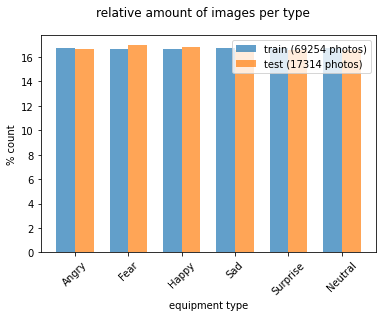

In [38]:
X_aug_train_smote, X_aug_test_smote, y_aug_train_smote, y_aug_test_smote = train_test_split(
    X_aug_smote, 
    y_aug_smote, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_aug_train_smote, loc='left')
plot_train_test_distribution(y_aug_test_smote, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_aug_train_smote)), 
    'test ({0} photos)'.format(len(y_aug_test_smote))
]);

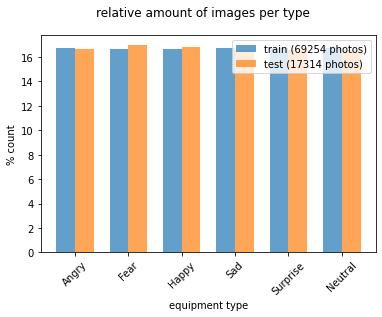

In [63]:
X_aug_train_ros, X_aug_test_ros, y_aug_train_ros, y_aug_test_ros = train_test_split(
    X_aug_ros, 
    y_aug_ros, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_aug_train_ros, loc='left')
plot_train_test_distribution(y_aug_test_ros, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_aug_train_ros)), 
    'test ({0} photos)'.format(len(y_aug_test_ros))
]);

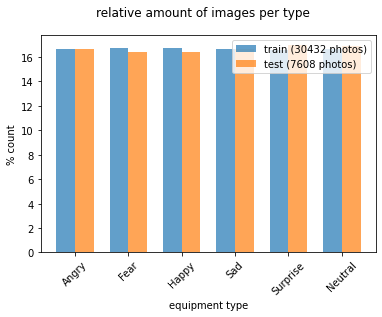

In [64]:
X_aug_train_rus, X_aug_test_rus, y_aug_train_rus, y_aug_test_rus = train_test_split(
    X_aug_rus, 
    y_aug_rus, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_aug_train_rus, loc='left')
plot_train_test_distribution(y_aug_test_rus, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_aug_train_rus)), 
    'test ({0} photos)'.format(len(y_aug_test_rus))
]);

In [47]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 

def KNN_Graph_trainer(X_train, X_test, y_train, y_test, max_k):
    acc = []
    # Will take some time
    for i in range(1,max_k):
        neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
        yhat = neigh.predict(X_test)
        acc.append(metrics.accuracy_score(y_test, yhat))
        
    return acc
        
def plot_knn(acc, y_test, max_k, graph_title):
    plt.figure(figsize=(10,6))
    plt.plot(range(1,max_k),acc,color = 'blue',linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title(graph_title)
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
    print(y_test.value_counts())

In [93]:
list_acc_knn_imb = KNN_Graph_trainer(X_train, X_test, y_train, y_test, 50)

In [82]:
list_acc_knn_rus = KNN_Graph_trainer(X_train_rus, X_test_rus, y_train_rus, y_test_rus, 50)

In [83]:
list_acc_knn_ros = KNN_Graph_trainer(X_train_ros, X_test_ros, y_train_ros, y_test_ros, 50)

In [84]:
list_acc_knn_smote = KNN_Graph_trainer(X_train_smote, X_test_smote, y_train_smote, y_test_smote, 50)

In [75]:
list_acc_knn_rus_aug = KNN_Graph_trainer(X_aug_train_rus, X_aug_test_rus, y_aug_train_rus, y_aug_test_rus, 50)

In [80]:
list_acc_knn_ros_aug1 = KNN_Graph_trainer(X_aug_train_ros, X_aug_test_ros, y_aug_train_ros, y_aug_test_ros, 50)

In [81]:
list_acc_knn_smote_aug1 = KNN_Graph_trainer(X_aug_train_smote, X_aug_test_smote, y_aug_train_smote, y_aug_test_smote, 50)

Maximum accuracy:- 0.3808597205023881 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


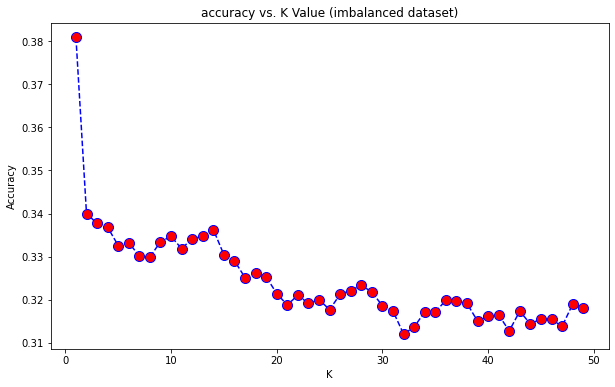

In [95]:
plot_knn(list_acc_knn_imb, 50, 'accuracy vs. K Value (imbalanced dataset)')

Maximum accuracy:- 0.34963196635120924 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


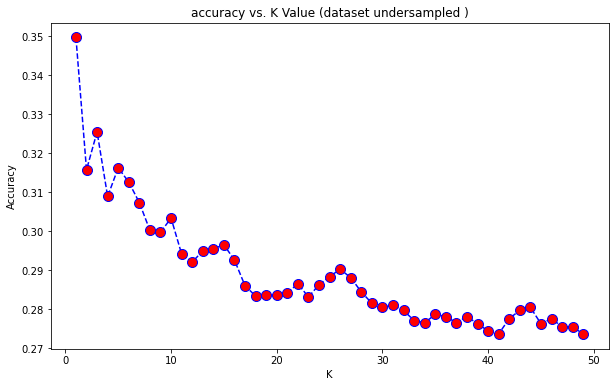

In [96]:
plot_knn(list_acc_knn_rus, 50, 'accuracy vs. K Value (dataset undersampled)')

Maximum accuracy:- 0.7005891186323207 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


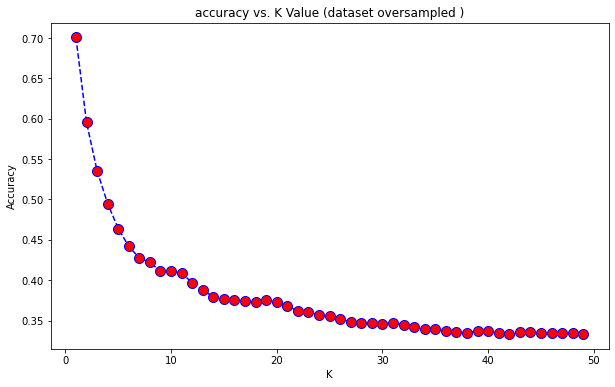

In [97]:
plot_knn(list_acc_knn_ros, 50, 'accuracy vs. K Value (dataset oversampled)')

Maximum accuracy:- 0.7038234954372184 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


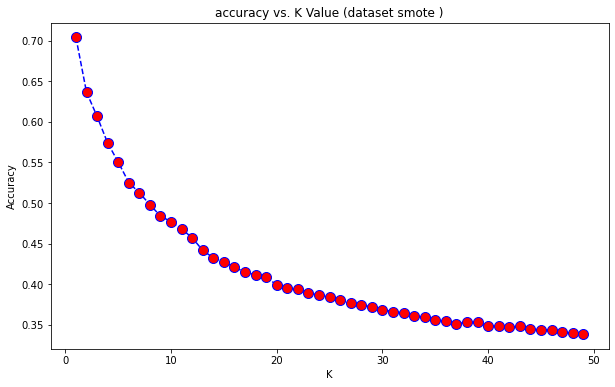

In [98]:
plot_knn(list_acc_knn_smote, 50, 'accuracy vs. K Value (dataset smote)')

Maximum accuracy:- 0.31309148264984227 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


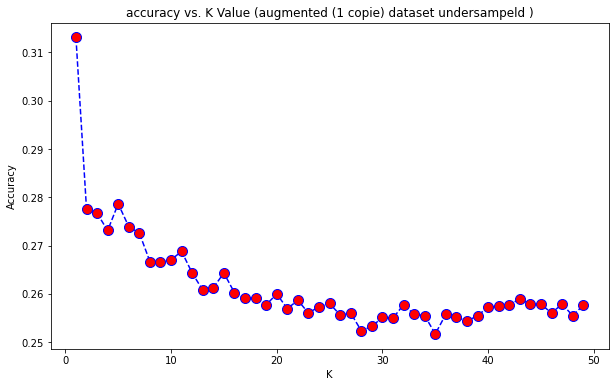

In [99]:
plot_knn(list_acc_knn_rus_aug, 50, 'accuracy vs. K Value (augmented (1 copie) dataset undersampeld)')

Maximum accuracy:- 0.6809518308882985 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


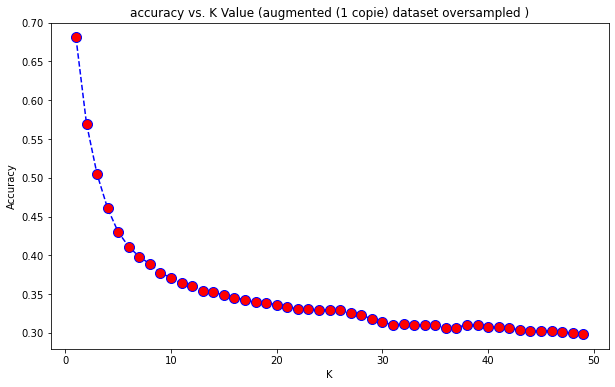

In [100]:
plot_knn(list_acc_knn_ros_aug1, 50, 'accuracy vs. K Value (augmented (1 copie) dataset oversampled)')

Maximum accuracy:- 0.6975280120133995 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


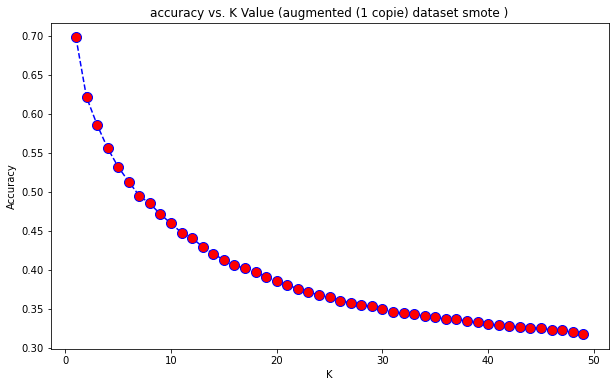

In [101]:
plot_knn(list_acc_knn_smote_aug1, 50, 'accuracy vs. K Value (augmented (1 copie) dataset smote)')

In [115]:
neigh = KNeighborsClassifier(n_neighbors = 1).fit(X_aug_train_smote, y_aug_train_smote)
# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
# test_image = import_test_sample("data/Images_for_testing/17085294-close-up-image-of-shocked-man-face-against-white-background.jpg")

(48, 48, 1)


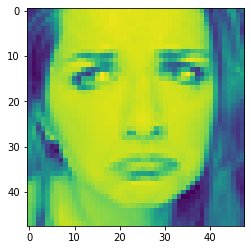

In [146]:
test_image = import_test_sample("data/Images_for_testing/5583362-a-close-up-of-a-beautiful-young-woman-pulling-a-sad-face-.jpg")

In [147]:
# (0=Angry, 1=Fear, 2=Happy, 3=Sad, 4=Surprise, 5=Neutral)
neigh.predict(np.reshape(test_image, (1, 2304)))

array([5])

In [57]:
FILE_NAME_AUG = "face_augmentated_3.csv" # Update name
file_path_aug = os.sep.join(data_path + [FILE_NAME_AUG])
data_aug_3 = pd.read_csv(file_path_aug)

In [58]:
data_aug_3.shape

(113044, 3)

In [59]:
data_aug_3.head()

,emotion,pixels,Original
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,True
1,0,144 144 152 159 164 168 157 151 144 132 110 86...,False
2,0,72 91 110 122 125 124 122 118 112 112 115 121 ...,False
3,0,173 163 144 119 110 118 138 157 164 168 170 17...,False
4,0,151 150 147 155 148 133 111 140 170 174 182 15...,True


In [60]:
data_aug_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113044 entries, 0 to 113043
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   emotion   113044 non-null  int64 
 1   pixels    113044 non-null  object
 2   Original  113044 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 1.8+ MB


In [61]:
from collections import Counter

print('number of samples: ', len(data_aug_3))
print('number of unique samples: ', len(data_aug_3[data_aug_3.columns[1]].unique()))
print('keys: ', list(data_aug_3.keys()))
print('\n')

for i in range(len(CLASS_NAMES_WITHOUT_DISGUST)):
    print(CLASS_NAMES_WITHOUT_DISGUST[i] + ' ', ((data_aug_3['emotion'].value_counts())[i]))


number of samples:  113044
number of unique samples:  111875
keys:  ['emotion', 'pixels', 'Original']


Angry  15952
Fear  16384
Happy  28856
Sad  19316
Surprise  12680
Neutral  19856


In [62]:
data_aug_3.drop('Original', axis=1, inplace=True)
%time X_aug_3, y_aug_3 = data_X_y(data_aug_3)
y_aug_3 = y_aug_3.astype('int32')

print(X_aug_3.shape)
print(y_aug_3.shape)

Wall time: 3min 22s
(113044, 48, 48, 1)
(113044,)


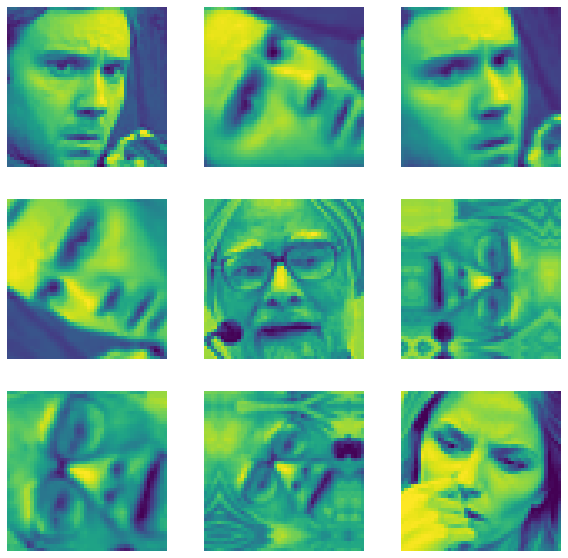

In [63]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_aug_3[i])
    plt.axis("off")

In [64]:
print(X_aug_3.shape)
X_aug_3 = reshape_X(X_aug_3)
print(X_aug_3.shape)

(113044, 48, 48, 1)
(113044, 2304)


In [65]:
X_aug_3_rus, y_aug_3_rus = rus.fit_resample(X_aug_3,y_aug_3) # This data is undersampled
X_aug_3_ros, y_aug_3_ros = ros.fit_resample(X_aug_3,y_aug_3) # This data is oversampled
X_aug_3_smote, y_aug_3_smote = smote.fit_resample(X_aug_3,y_aug_3) # This data is oversampled with smote

print(y_aug_3_rus.value_counts())
print(y_aug_3_ros.value_counts())
print(y_aug_3_smote.value_counts())

0    12680
1    12680
2    12680
3    12680
4    12680
5    12680
Name: emotion, dtype: int64
0    28856
1    28856
2    28856
3    28856
4    28856
5    28856
Name: emotion, dtype: int64
0    28856
1    28856
2    28856
3    28856
4    28856
5    28856
Name: emotion, dtype: int64


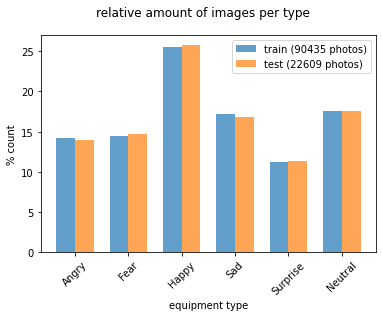

In [36]:
X_aug_3_train, X_aug_3_test, y_aug_3_train, y_aug_3_test = train_test_split(
    X_aug_3, 
    y_aug_3, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_aug_3_train, loc='left')
plot_train_test_distribution(y_aug_3_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_aug_3_train)), 
    'test ({0} photos)'.format(len(y_aug_3_test))
]);

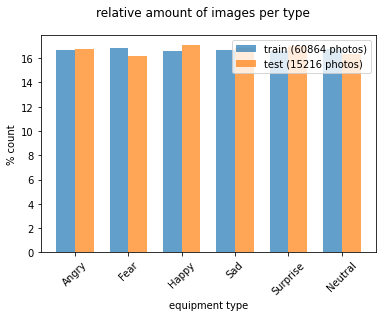

In [37]:
X_aug_3_train_rus, X_aug_3_test_rus, y_aug_3_train_rus, y_aug_3_test_rus = train_test_split(
    X_aug_3_rus, 
    y_aug_3_rus, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_aug_3_train_rus, loc='left')
plot_train_test_distribution(y_aug_3_test_rus, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_aug_3_train_rus)), 
    'test ({0} photos)'.format(len(y_aug_3_test_rus))
]);

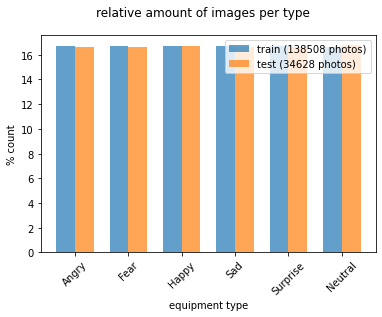

In [31]:
X_aug_3_train_ros, X_aug_3_test_ros, y_aug_3_train_ros, y_aug_3_test_ros = train_test_split(
    X_aug_3_ros, 
    y_aug_3_ros, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_aug_3_train_ros, loc='left')
plot_train_test_distribution(y_aug_3_test_ros, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_aug_3_train_ros)), 
    'test ({0} photos)'.format(len(y_aug_3_test_ros))
]);

In [82]:
%time list_acc_knn_aug_3_imb = KNN_Graph_trainer(X_aug_3, X_test, y_aug_3, y_test, 15)

Wall time: 10min 10s


In [88]:
%time list_acc_knn_aug_3_rus = KNN_Graph_trainer(X_aug_3_rus, X_test, y_aug_3_rus, y_test, 15)

Wall time: 7min 20s


In [89]:
%time list_acc_knn_aug_3_ros = KNN_Graph_trainer(X_aug_3_ros, X_test, y_aug_3_ros, y_test, 15)

Wall time: 17min 52s


In [90]:
%time list_acc_knn_aug_3_smote = KNN_Graph_trainer(X_aug_3_smote, X_test, y_aug_3_smote, y_test, 15)

Wall time: 18min 12s


Maximum accuracy:- 0.3923871515494552 at K = 0
2    28856
5    19856
3    19316
1    16384
0    15952
4    12680
Name: emotion, dtype: int64


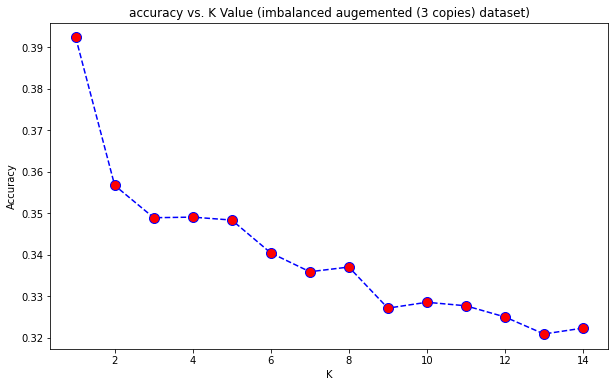

In [92]:
plot_knn(list_acc_knn_aug_3_imb, y_aug_3, 15, 'accuracy vs. K Value (imbalanced augemented (3 copies) dataset)')

Maximum accuracy:- 0.35389840101881986 at K = 0
0    12680
1    12680
2    12680
3    12680
4    12680
5    12680
Name: emotion, dtype: int64


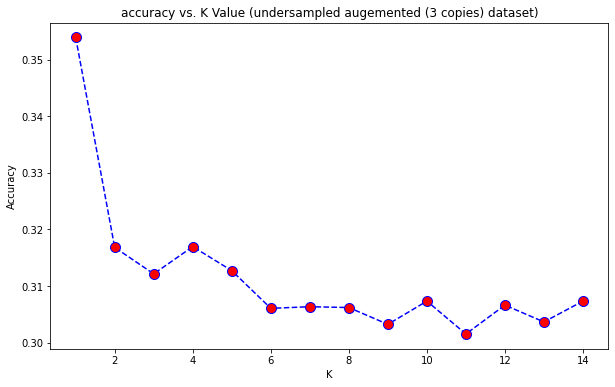

In [93]:
plot_knn(list_acc_knn_aug_3_rus, y_aug_3_rus, 15, 'accuracy vs. K Value (undersampled augemented (3 copies) dataset)')

Maximum accuracy:- 0.3923871515494552 at K = 0
0    28856
1    28856
2    28856
3    28856
4    28856
5    28856
Name: emotion, dtype: int64


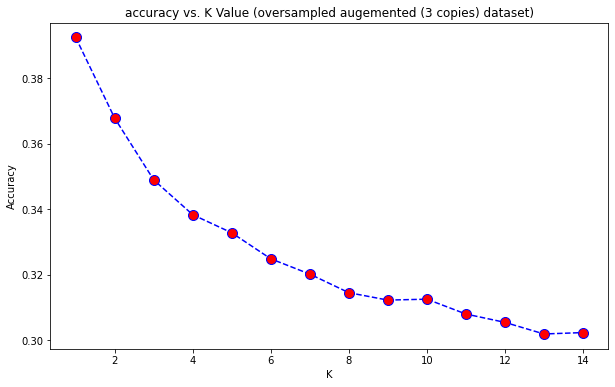

In [94]:
plot_knn(list_acc_knn_aug_3_ros, y_aug_3_ros, 15, 'accuracy vs. K Value (oversampled augemented (3 copies) dataset)')

Maximum accuracy:- 0.36238856657704827 at K = 0
0    28856
1    28856
2    28856
3    28856
4    28856
5    28856
Name: emotion, dtype: int64


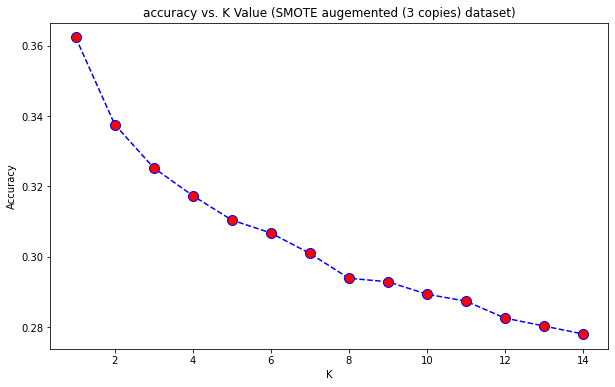

In [95]:
plot_knn(list_acc_knn_aug_3_smote, y_aug_3_smote, 15, 'accuracy vs. K Value (SMOTE augemented (3 copies) dataset)')

In [39]:
def KNN_Graph_trainer_distance(X_train, X_test, y_train, y_test, max_k):
    acc = []
    # Will take some time
    for i in range(1,max_k):
        neigh = KNeighborsClassifier(n_neighbors = i, weights = 'distance').fit(X_train, y_train)
        yhat = neigh.predict(X_test)
        acc.append(metrics.accuracy_score(y_test, yhat))
        
    return acc

In [90]:
%time list_acc_knn_smote_weight = KNN_Graph_trainer_distance(X_train_smote, X_test_smote, y_train_smote, y_test_smote, 15)

Wall time: 5min 30s


Maximum accuracy:- 0.7064803049555273 at K = 0
5    1492
0    1471
2    1464
1    1447
4    1411
3    1372
Name: emotion, dtype: int64


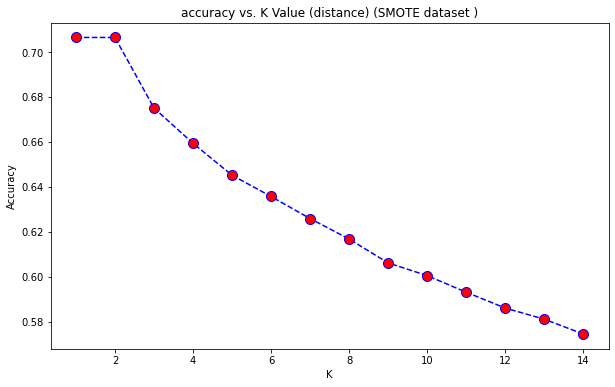

In [91]:
plot_knn(list_acc_knn_smote_weight, y_test_smote, 15, 'accuracy vs. K Value (distance) (SMOTE dataset )')

In [40]:
def KNN_Graph_trainer_p1(X_train, X_test, y_train, y_test, max_k):
    acc = []
    # Will take some time
    for i in range(1,max_k):
        neigh = KNeighborsClassifier(n_neighbors = i, p=1).fit(X_train, y_train)
        yhat = neigh.predict(X_test)
        acc.append(metrics.accuracy_score(y_test, yhat))
        
    return acc

In [93]:
%time list_acc_knn_smote_p1 = KNN_Graph_trainer_p1(X_train_smote, X_test_smote, y_train_smote, y_test_smote, 15)

Wall time: 3h 53min 36s


Maximum accuracy:- 0.713411112394594 at K = 0
5    1492
0    1471
2    1464
1    1447
4    1411
3    1372
Name: emotion, dtype: int64


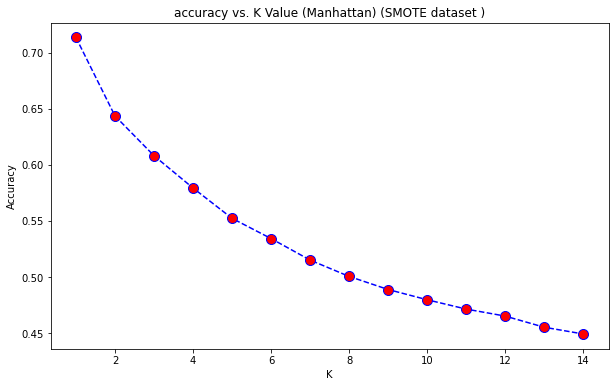

In [94]:
plot_knn(list_acc_knn_smote_p1, y_test_smote, 15, 'accuracy vs. K Value (Manhattan) (SMOTE dataset)')

In [97]:
y_pred = knn_distance_k_1_smote.predict(X_test_smote)
print(metrics.accuracy_score(y_test_smote, y_pred))

0.7064803049555273


In [99]:
y_pred = knn_distance_k_1_smote.predict(X_train_smote)
print(metrics.accuracy_score(y_train_smote, y_pred))

0.9998844832067462


(48, 48, 1)
Surprise


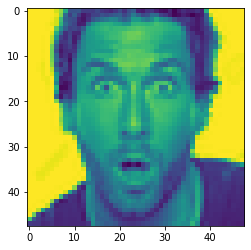

In [107]:
# (0=Angry, 1=Fear, 2=Happy, 3=Sad, 4=Surprise, 5=Neutral)
test_image = import_test_sample("data/Images_for_testing/17085294-close-up-image-of-shocked-man-face-against-white-background.jpg")
y_pred = knn_distance_k_1_smote.predict(np.reshape(test_image, (1, 2304)))
print(CLASS_NAMES_WITHOUT_DISGUST[y_pred[0]])

(48, 48, 1)
Angry


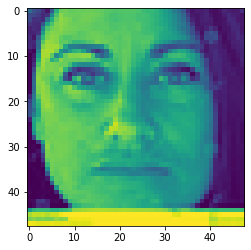

In [120]:
test_image = import_test_sample("data/Images_for_testing/pretty-spanish-woman-face-close-up-170705.jpg")
y_pred = knn_distance_k_1_smote.predict(np.reshape(test_image, (1, 2304)))
print(CLASS_NAMES_WITHOUT_DISGUST[y_pred[0]])

(48, 48, 1)
Fear


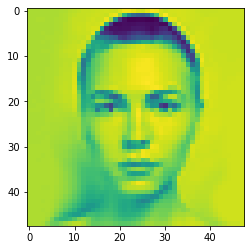

In [119]:
test_image = import_test_sample("data/Images_for_testing/iStock-510970466-1170x780.jpg")
y_pred = knn_distance_k_1_smote.predict(np.reshape(test_image, (1, 2304)))
print(CLASS_NAMES_WITHOUT_DISGUST[y_pred[0]])

(48, 48, 1)
Fear


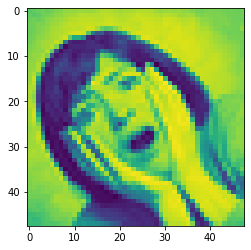

In [139]:
test_image = import_test_sample("data/Images_for_testing/66716562-woman-close-up-face-with-fear-afraid-emotion-close-up.jpg")
y_pred = knn_distance_k_1_smote.predict(np.reshape(test_image, (1, 2304)))
print(CLASS_NAMES_WITHOUT_DISGUST[y_pred[0]])

In [49]:
from sklearn.metrics import plot_confusion_matrix

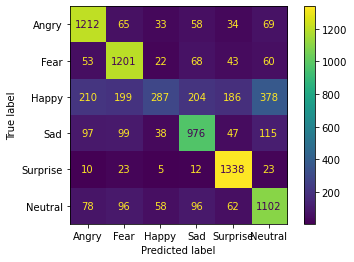

In [135]:
plot_confusion_matrix(knn_distance_k_1_smote, X_test_smote, y_test_smote, display_labels = CLASS_NAMES_WITHOUT_DISGUST);

In [136]:
# filename = 'knn_distance_k_1_smote_acc_70%.joblib'
# joblib.dump(knn_distance_k_1_smote, filename)

['knn_distance_k_1_smote_acc_70%.joblib']

In [137]:
# loaded_knn = joblib.load("./knn_distance_k_1_smote_acc_70%.joblib")

In [51]:
file_path = os.sep.join(data_path + ['icml_face_data.csv'])
data_test = pd.read_csv(file_path)
test = ["PrivateTest", "PublicTest"]
data_test = data_test.rename(columns= { " pixels":"pixels"})
data_test = data_test[data_test[' Usage'].isin(test) ]

# If icml_face_data.csv is used
data_test.drop(' Usage', axis=1, inplace=True)

data_test.head()

,emotion,pixels
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [52]:
data_test.shape

(7178, 2)

In [53]:
data_test = data_test[data_test['emotion'] != 1] # Drops the emotion Disgust
data_test = data_test.replace({
    2 : 1,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 5
})
data_test.shape, data_test.emotion.unique()

((7067, 2), array([0, 3, 5, 2, 1, 4], dtype=int64))

In [54]:
X_test, y_test = data_X_y(data_test)

In [55]:
print(X_test.shape)
X_test = reshape_X(X_test)
print(X_test.shape)

(7067, 48, 48, 1)
(7067, 2304)


In [55]:
# X_rus, y_rus
# X_ros, y_ros
# X_smote, y_smote
# X_aug_smote, y_aug_smote
# X_aug_ros, y_aug_ros
# X_aug_rus, y_aug_rus
# X_test, y_test

In [50]:
%time list_acc_knn_imb_weight = KNN_Graph_trainer_distance(X, X_test, y, y_test, 15)

Wall time: 2min 15s


In [58]:
%time list_acc_knn_rus_weight = KNN_Graph_trainer_distance(X_rus, X_test, y_rus, y_test, 15)

Wall time: 1min 38s


In [59]:
%time list_acc_knn_ros_weight = KNN_Graph_trainer_distance(X_ros, X_test, y_ros, y_test, 15)

Wall time: 3min 43s


In [60]:
%time list_acc_knn_smote_weight = KNN_Graph_trainer_distance(X_smote, X_test, y_smote, y_test, 15)

Wall time: 3min 42s


Maximum accuracy:- 0.40356586953445595 at K = 0
2    1774
3    1247
5    1233
1    1024
0     958
4     831
Name: emotion, dtype: int64


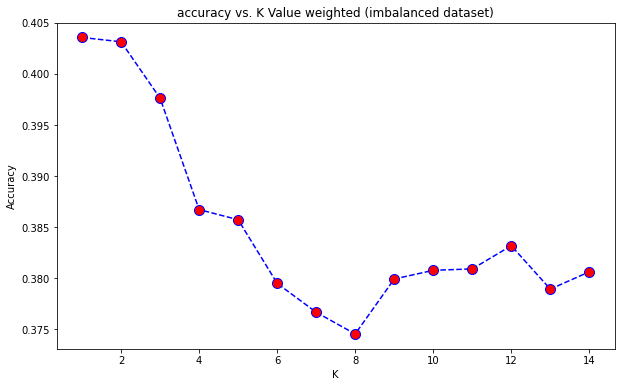

In [55]:
plot_knn(list_acc_knn_imb_weight, y_test, 15, 'accuracy vs. K Value weighted (imbalanced dataset)')

Maximum accuracy:- 0.3630960803735673 at K = 0
2    1774
3    1247
5    1233
1    1024
0     958
4     831
Name: emotion, dtype: int64


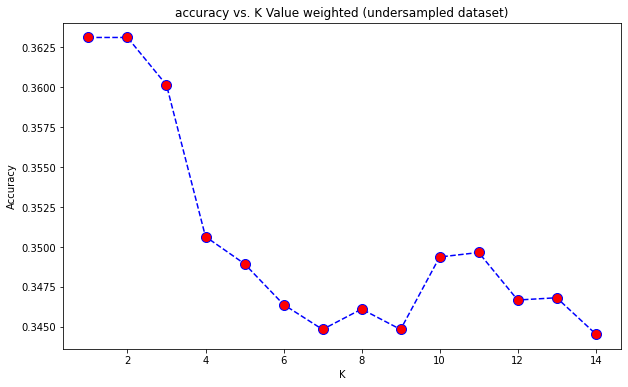

In [61]:
plot_knn(list_acc_knn_rus_weight, y_test, 15, 'accuracy vs. K Value weighted (undersampled dataset)')

Maximum accuracy:- 0.40356586953445595 at K = 0
2    1774
3    1247
5    1233
1    1024
0     958
4     831
Name: emotion, dtype: int64


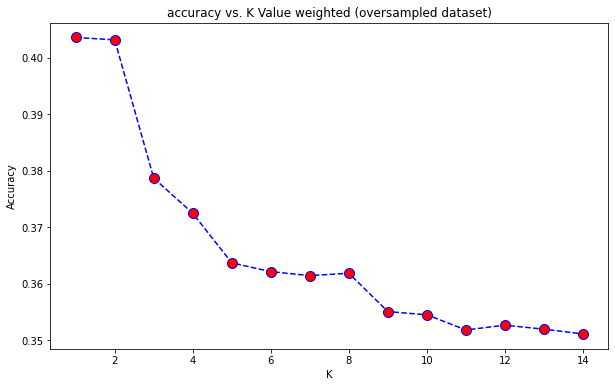

In [62]:
plot_knn(list_acc_knn_ros_weight, y_test, 15, 'accuracy vs. K Value weighted (oversampled dataset)')

Maximum accuracy:- 0.3715862459317957 at K = 0
2    1774
3    1247
5    1233
1    1024
0     958
4     831
Name: emotion, dtype: int64


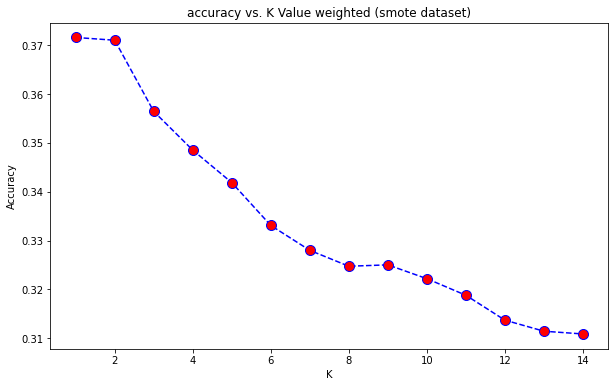

In [63]:
plot_knn(list_acc_knn_smote_weight, y_test, 15, 'accuracy vs. K Value weighted (smote dataset)')

In [56]:
# X_aug_3_rus, y_aug_3_rus
# X_aug_3_ros, y_aug_3_ros
# X_aug_3_smote, y_aug_3_smote

In [78]:
%time list_acc_knn_rus3_weight = KNN_Graph_trainer_distance(X_aug_3_rus, X_test, y_aug_3_rus, y_test, 10)

Wall time: 7min 58s


In [79]:
%time list_acc_knn_ros3_weight = KNN_Graph_trainer_distance(X_aug_3_ros, X_test, y_aug_3_ros, y_test, 10)

Wall time: 19min 47s


In [80]:
%time list_acc_knn_smote3_weight = KNN_Graph_trainer_distance(X_aug_3_smote, X_test, y_aug_3_smote, y_test, 10)

Wall time: 16min 59s


Maximum accuracy:- 0.35545493137116174 at K = 2
2    1774
3    1247
5    1233
1    1024
0     958
4     831
Name: emotion, dtype: int64


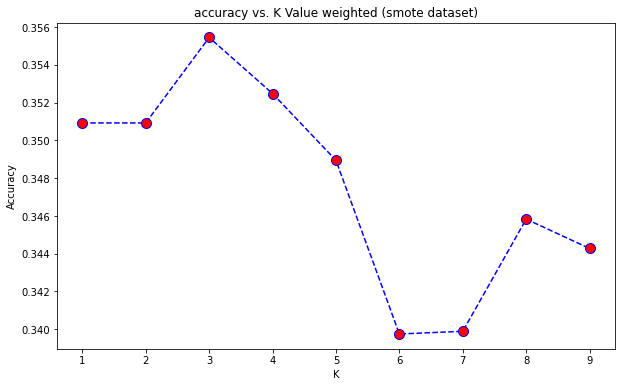

In [81]:
plot_knn(list_acc_knn_rus3_weight, y_test, 10, 'accuracy vs. K Value weighted (smote dataset)')

Maximum accuracy:- 0.3923871515494552 at K = 0
2    1774
3    1247
5    1233
1    1024
0     958
4     831
Name: emotion, dtype: int64


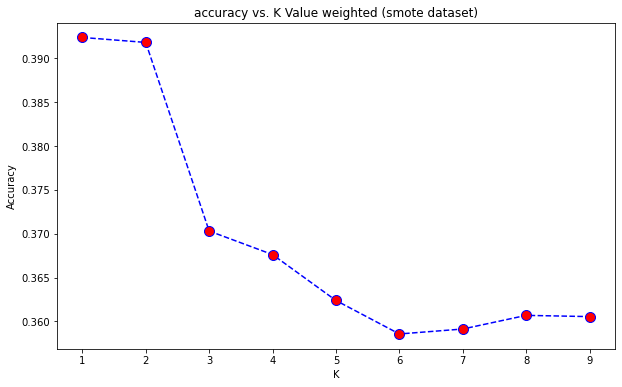

In [82]:
plot_knn(list_acc_knn_ros3_weight, y_test, 10, 'accuracy vs. K Value weighted (smote dataset)')

Maximum accuracy:- 0.36408659968869395 at K = 0
2    1774
3    1247
5    1233
1    1024
0     958
4     831
Name: emotion, dtype: int64


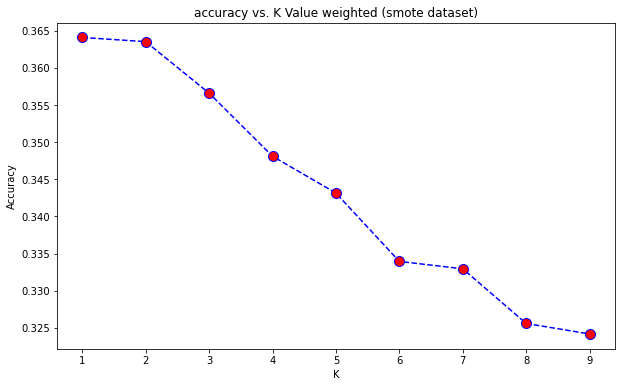

In [83]:
plot_knn(list_acc_knn_smote3_weight, y_test, 10, 'accuracy vs. K Value weighted (smote dataset)')

In [42]:
# # For when the file is created
FILE_NAME_AUG = "face_augmentated_9.csv" # Update name
file_path_aug = os.sep.join(data_path + [FILE_NAME_AUG])
data_aug_9 = pd.read_csv(file_path_aug)

In [43]:
data_aug_9.head()

,emotion,pixels,Original
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,True
1,0,45 43 46 47 51 55 59 66 80 91 76 98 146 183 19...,False
2,0,121 163 191 198 198 195 173 131 112 109 95 90 ...,False
3,0,77 102 95 64 58 60 60 60 60 61 61 60 59 58 57 ...,False
4,0,88 68 59 73 92 111 127 135 139 142 145 146 147...,False


In [44]:
data_aug_9.shape

(282610, 3)

In [45]:
data_aug_9.drop('Original', axis=1, inplace=True)
%time X_aug_9, y_aug_9 = data_X_y(data_aug_9)
y_aug_9 = y_aug_9.astype('int32')

print(X_aug_9.shape)
print(y_aug_9.shape)

Wall time: 11min 12s
(282610, 48, 48, 1)
(282610,)


In [46]:
print(X_aug_9.shape)
X_aug_9 = reshape_X(X_aug_9)
print(X_aug_9.shape)

(282610, 48, 48, 1)
(282610, 2304)


In [47]:
X_aug_9_smote, y_aug_9_smote = smote.fit_resample(X_aug_9,y_aug_9) # This data is oversampled with smote
X_aug_9_ros, y_aug_9_ros = ros.fit_resample(X_aug_9,y_aug_9) # This data is oversampled
X_aug_9_rus, y_aug_9_rus = rus.fit_resample(X_aug_9,y_aug_9) # This data is undersampled

print(y_aug_9_rus.value_counts())
print(y_aug_9_ros.value_counts())
print(y_aug_9_smote.value_counts())

0    31700
1    31700
2    31700
3    31700
4    31700
5    31700
Name: emotion, dtype: int64
0    72140
1    72140
2    72140
3    72140
4    72140
5    72140
Name: emotion, dtype: int64
0    72140
1    72140
2    72140
3    72140
4    72140
5    72140
Name: emotion, dtype: int64


In [63]:
%time list_acc_knn_aug_9_rus_weight = KNN_Graph_trainer_distance(X_aug_9_rus, X_test, y_aug_9_rus, y_test, 15)

Wall time: 18min 41s


In [64]:
%time list_acc_knn_aug_9_ros_weight = KNN_Graph_trainer_distance(X_aug_9_ros, X_test, y_aug_9_ros, y_test, 15)

Wall time: 1h 8s


In [65]:
%time list_acc_knn_aug_9_smote_weight = KNN_Graph_trainer_distance(X_aug_9_smote, X_test, y_aug_9_smote, y_test, 15)

Wall time: 1h 3min 19s


Maximum accuracy:- 0.3615395500212254 at K = 7
2    1774
3    1247
5    1233
1    1024
0     958
4     831
Name: emotion, dtype: int64


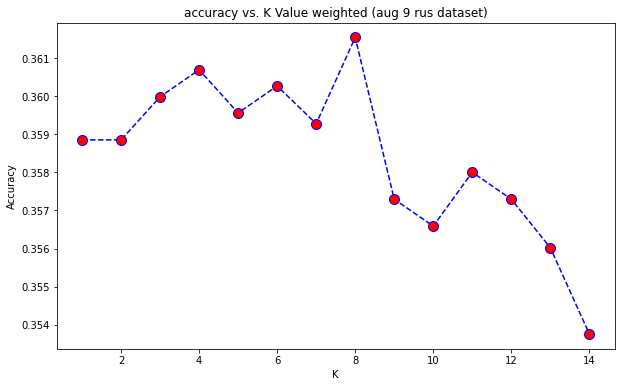

In [67]:
plot_knn(list_acc_knn_aug_9_rus_weight, y_test, 15, 'accuracy vs. K Value weighted (aug 9 rus dataset)')

Maximum accuracy:- 0.39323616810527806 at K = 0
2    1774
3    1247
5    1233
1    1024
0     958
4     831
Name: emotion, dtype: int64


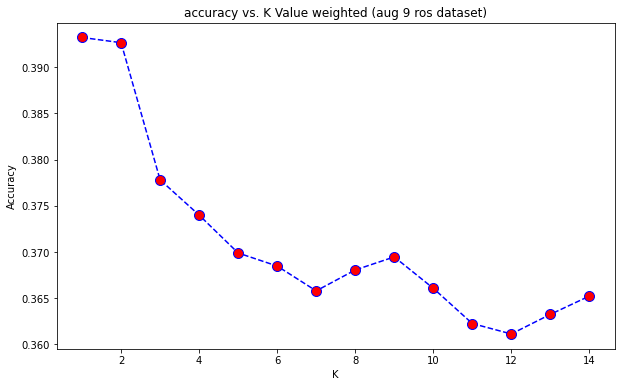

In [68]:
plot_knn(list_acc_knn_aug_9_ros_weight, y_test, 15, 'accuracy vs. K Value weighted (aug 9 ros dataset)')

Maximum accuracy:- 0.3683316824678081 at K = 0
2    1774
3    1247
5    1233
1    1024
0     958
4     831
Name: emotion, dtype: int64


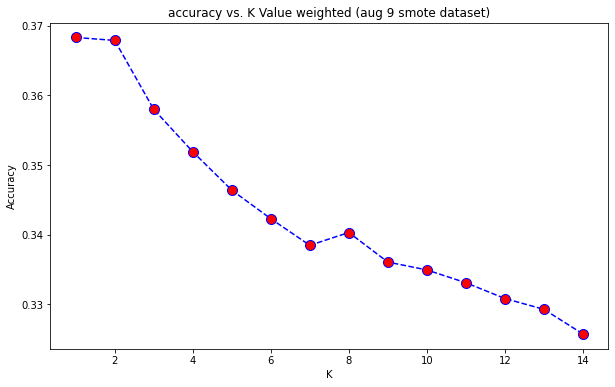

In [69]:
plot_knn(list_acc_knn_aug_9_smote_weight, y_test, 15, 'accuracy vs. K Value weighted (aug 9 smote dataset)')

In [41]:
from sklearn.model_selection import GridSearchCV

In [41]:
knn_GCV = KNeighborsClassifier()

In [42]:
param_grid = [
    {'n_neighbors': [i for i in range(1,15+1)],
     'weights' : ['uniform', 'distance'],
     'p': [1,2]
    }
]

In [43]:
clf = GridSearchCV(knn_GCV, param_grid = param_grid, cv = 2, scoring='accuracy', verbose = 3, n_jobs=-1)

In [33]:
clf.fit(X_rus, y_rus)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=3)

In [40]:
clf.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [39]:
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.3765388425074289

In [44]:
knn_best_ros = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform').fit(X_ros, y_ros)
y_pred_for_best_ros = knn_best_ros.predict(X_test)
metrics.accuracy_score(y_test, y_pred_for_best_ros)

0.4211122116881279

In [44]:
clf_cv3 = GridSearchCV(knn_GCV, param_grid = param_grid, cv = 3, scoring='accuracy', verbose = 3, n_jobs=-1)

In [46]:
clf_cv3.fit(X_rus, y_rus)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=3)

In [47]:
clf_cv3.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [48]:
y_pred = clf_cv3.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.3765388425074289

In [60]:
knn_best_smote = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform').fit(X_smote, y_smote)
y_pred_for_best_smote = knn_best_smote.predict(X_test)
metrics.accuracy_score(y_test, y_pred_for_best_smote)

0.39776425640299984

In [61]:
knn_best_aug_3_ros = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform').fit(X_aug_3_ros, y_aug_3_ros)
y_pred_for_best_aug_3_ros = knn_best_aug_3_ros.predict(X_test)
metrics.accuracy_score(y_test, y_pred_for_best_aug_3_ros)

0.4116315268147729

In [63]:
knn_best_aug_3_smote = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform').fit(X_aug_3_smote, y_aug_3_smote)
y_pred_for_best_aug_3_smote = knn_best_aug_3_smote.predict(X_test)
metrics.accuracy_score(y_test, y_pred_for_best_aug_3_smote)

0.3905476156785057

In [49]:
knn_best_aug_9_ros = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform', n_jobs=-1).fit(X_aug_9_ros, y_aug_9_ros)
%time y_pred_for_best_aug_9_ros = knn_best_aug_9_ros.predict(X_test)
metrics.accuracy_score(y_test, y_pred_for_best_aug_9_ros)

Wall time: 23min 26s


0.4110655157775577

In [42]:
from scipy import ndimage

# Sigma can be changed for more or less blur
def blur_X(X, sigma = 0.8):
    for i in range(0, X.shape[0]):
        X[i] = ndimage.gaussian_filter(X[i], sigma=sigma)
    return X

In [43]:
X_blur = blur_X(X)

In [44]:
X_blur_ros, y_blur_ros = ros.fit_resample(X_blur,y) # This data is oversampled
X_blur_smote, y_blur_smote = smote.fit_resample(X_blur,y) # This data is oversampled with smote

In [55]:
knn_best_blur_ros = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform', n_jobs=-1).fit(X_blur_ros, y_blur_ros)
y_pred_for_best_blur_ros = knn_best_blur_ros.predict(X_test)
metrics.accuracy_score(y_test, y_pred_for_best_blur_ros)

0.42436677515211546

In [57]:
knn_best_blur_smote = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform', n_jobs=-1).fit(X_blur_smote, y_blur_smote)
y_pred_for_best_blur_smote = knn_best_blur_smote.predict(X_test)
metrics.accuracy_score(y_test, y_pred_for_best_blur_smote)

0.3963492288099618

In [45]:
from sklearn.metrics import classification_report

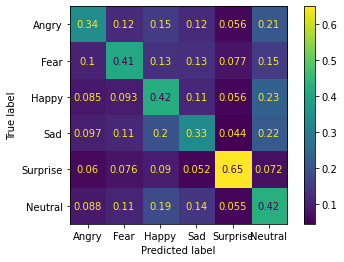

In [66]:
knn_best_ros = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform', n_jobs=-1).fit(X_ros, y_ros)
plot_confusion_matrix(knn_best_ros, X_test, y_test, display_labels = CLASS_NAMES_WITHOUT_DISGUST, normalize="true");

In [67]:
y_pred = knn_best_ros.predict(X_test)
print(classification_report(y_test, y_pred, target_names=CLASS_NAMES_WITHOUT_DISGUST))

              precision    recall  f1-score   support

       Angry       0.38      0.34      0.36       958
        Fear       0.41      0.41      0.41      1024
       Happy       0.47      0.42      0.45      1774
         Sad       0.39      0.33      0.36      1247
    Surprise       0.60      0.65      0.63       831
     Neutral       0.32      0.42      0.37      1233

    accuracy                           0.42      7067
   macro avg       0.43      0.43      0.43      7067
weighted avg       0.43      0.42      0.42      7067



In [68]:
knn_best_blur_ros = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform', n_jobs=-1).fit(X_blur_ros, y_blur_ros)

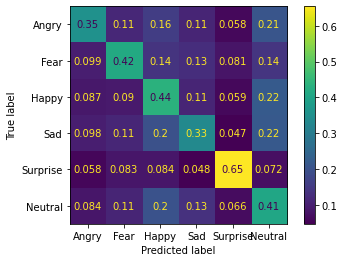

In [62]:
knn_best_blur_ros = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform', n_jobs=-1).fit(X_blur_ros, y_blur_ros)
plot_confusion_matrix(knn_best_blur_ros, X_test, y_test, display_labels = CLASS_NAMES_WITHOUT_DISGUST, normalize="true");

In [63]:
y_pred = knn_best_blur_ros.predict(X_test)
print(classification_report(y_test, y_pred, target_names=CLASS_NAMES_WITHOUT_DISGUST))

              precision    recall  f1-score   support

       Angry       0.39      0.35      0.37       958
        Fear       0.41      0.42      0.41      1024
       Happy       0.48      0.44      0.45      1774
         Sad       0.40      0.33      0.36      1247
    Surprise       0.59      0.65      0.62       831
     Neutral       0.32      0.41      0.36      1233

    accuracy                           0.42      7067
   macro avg       0.43      0.43      0.43      7067
weighted avg       0.43      0.42      0.42      7067



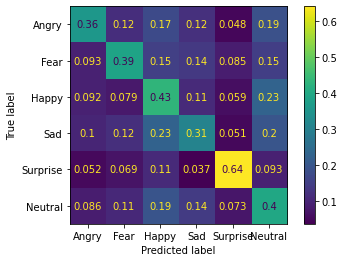

In [69]:
knn_best_aug_3_ros = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform', n_jobs=-1).fit(X_aug_3_ros, y_aug_3_ros)
plot_confusion_matrix(knn_best_aug_3_ros, X_test, y_test, display_labels = CLASS_NAMES_WITHOUT_DISGUST, normalize="true");

In [70]:
y_pred = knn_best_aug_3_ros.predict(X_test)
print(classification_report(y_test, y_pred, target_names=CLASS_NAMES_WITHOUT_DISGUST))

              precision    recall  f1-score   support

       Angry       0.39      0.36      0.37       958
        Fear       0.40      0.39      0.39      1024
       Happy       0.45      0.43      0.44      1774
         Sad       0.37      0.31      0.34      1247
    Surprise       0.58      0.64      0.61       831
     Neutral       0.32      0.40      0.35      1233

    accuracy                           0.41      7067
   macro avg       0.42      0.42      0.42      7067
weighted avg       0.41      0.41      0.41      7067



In [71]:
import joblib

In [72]:
joblib.dump(knn_best_ros, 'knn_best_ros_42%.joblib')

['knn_best_ros_42%.joblib']

In [73]:
joblib.dump(knn_best_blur_ros, 'knn_best_blur_ros_42%.joblib')

['knn_best_blur_ros_42%.joblib']

In [74]:
joblib.dump(knn_best_aug_3_ros, 'knn_best_aug_3_ros_41%.joblib')

['knn_best_aug_3_ros_41%.joblib']